In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Importando os dados

In [ ]:
df1= pd.read_csv('Final_Day1.csv', header= None)
df2= pd.read_csv('Final_Day2.csv', header= None)

df3= pd.DataFrame(np.concatenate([df1, df2], axis= 0))

df3

,0,1,2,3,4
0,16146426.11,15608360.33,15942624.94,15610733.1,Inclinare_stgJos_FT_3s
1,16148521.37,15607733.78,15941315.25,15609966.13,Inclinare_stgJos_FT_3s
2,16131999.37,15607051.11,15918444.92,15611994.13,Inclinare_stgJos_FT_3s
3,16083052.7,15604054.44,15910035.29,15612191.41,Inclinare_stgJos_FT_3s
4,16024431.0,15598918.33,15874100.97,15608767.04,Inclinare_stgJos_FT_3s
...,...,...,...,...,...
50244,16104435.33,15803761.67,15908547.0,15676881.22,InclinareRotire_stg_FT_3s
50245,16103491.67,15804108.0,15908017.33,15676557.56,InclinareRotire_stg_FT_3s
50246,16103181.0,15804200.67,15907580.67,15676361.56,InclinareRotire_stg_FT_3s
50247,16103073.33,15803417.33,15907202.33,15675926.67,InclinareRotire_stg_FT_3s


## Encontrando os dados NaN

0    165
1    143
2    248
3    155
4      0
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


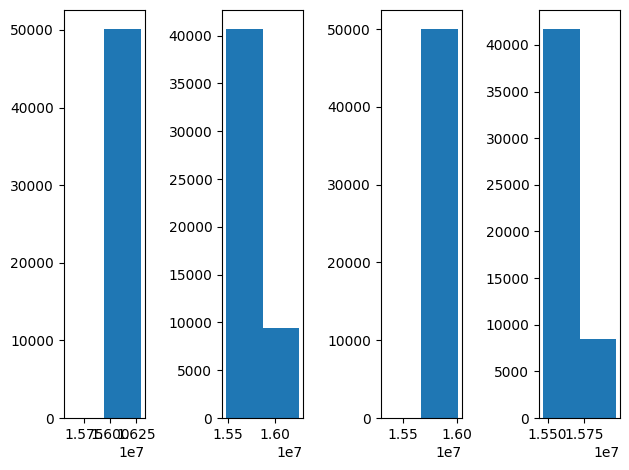

In [ ]:
# rows_with_nan = df3[df3.isna().any(axis=1)]
# print(rows_with_nan.index)
print(df3.isna().sum())

plt.subplot(1,4,1)
plt.hist(df3.iloc[:][0], bins= 2)
plt.subplot(1,4,2)
plt.hist(df3.iloc[:][1], bins= 2)
plt.subplot(1,4,3)
plt.hist(df3.iloc[:][2], bins= 2)
plt.subplot(1,4,4)
plt.hist(df3.iloc[:][3], bins= 2)
plt.tight_layout()

plt.show()

Existem dados NaN e eles são outliers aos dados comuns, desta forma entende-se que são dados comprometidos. Portanto, serão retirados.

In [ ]:
df3.dropna(inplace= True)
df3.reset_index(drop= True, inplace= True)

# Preparando os dados

## Label Encoder

In [ ]:
label_encoder = LabelEncoder()

df3[4] = label_encoder.fit_transform(df3[4])
df3

,0,1,2,3,4
0,16146426.11,15608360.33,15942624.94,15610733.1,4
1,16148521.37,15607733.78,15941315.25,15609966.13,4
2,16131999.37,15607051.11,15918444.92,15611994.13,4
3,16083052.7,15604054.44,15910035.29,15612191.41,4
4,16024431.0,15598918.33,15874100.97,15608767.04,4
...,...,...,...,...,...
49538,16104435.33,15803761.67,15908547.0,15676881.22,2
49539,16103491.67,15804108.0,15908017.33,15676557.56,2
49540,16103181.0,15804200.67,15907580.67,15676361.56,2
49541,16103073.33,15803417.33,15907202.33,15675926.67,2


### MinMaxScaler

In [ ]:
def MinMaxScale(x, min, max):
    return (x- min) / (max - min)

maxs = df3.max()
mins = df3.min()

for i in df3.columns:
  if i == 4:
    break
  else:
    df3[i] = MinMaxScale(df3[i], mins[i], maxs[i])

df3

,0,1,2,3,4
0,0.79167,0.211681,0.900769,0.292923,4
1,0.794647,0.210678,0.898868,0.29136,4
2,0.771175,0.209585,0.86567,0.295493,4
3,0.701639,0.204786,0.853463,0.295895,4
4,0.618359,0.19656,0.801302,0.288916,4
...,...,...,...,...,...
49538,0.732016,0.524602,0.851303,0.427731,2
49539,0.730676,0.525157,0.850534,0.427071,2
49540,0.730234,0.525305,0.8499,0.426672,2
49541,0.730081,0.524051,0.849351,0.425785,2


In [ ]:
df3_target = df3[4]
df3.drop(4, inplace= True, axis= 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df3, df3_target, test_size=0.4, random_state= 42)

In [ ]:
X_val = X_test[:int(len(X_test)/2)]
Y_val = Y_test[:int(len(Y_test)/2)]
X_test = X_test[int(len(X_test)/2):]
Y_test = Y_test[int(len(Y_test)/2):]

In [ ]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_val.shape, Y_val.shape

((29725, 4), (29725,), (9909, 4), (9909,), (9909, 4), (9909,))

## Model

In [ ]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
result = KNN.predict(X_test)

## Evaluation on test

In [ ]:
accuracy_score(result, Y_test) * 100

73.61994146735292

Text(113.9222222222222, 0.5, 'Predicted')

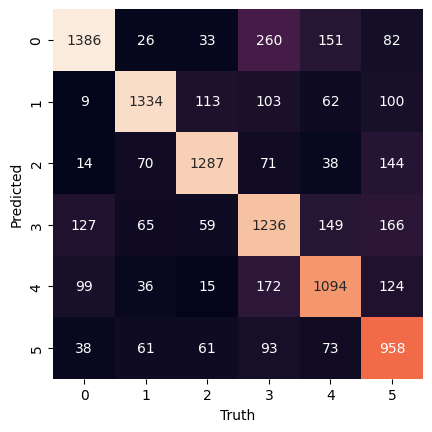

In [ ]:
mat = confusion_matrix(result, Y_test)
names = np.unique(result)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

## Evaluation on val

In [ ]:
result = KNN.predict(X_val)

In [ ]:
accuracy_score(result, Y_val) * 100

72.5905742254516

Text(113.9222222222222, 0.5, 'Predicted')

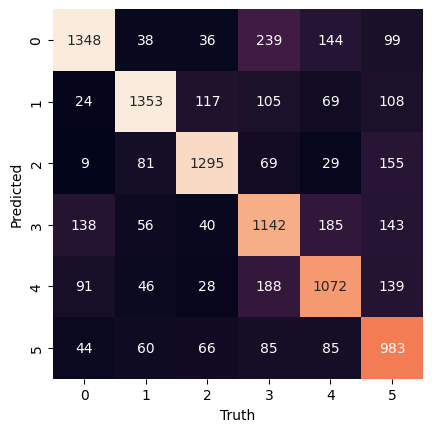

In [ ]:
mat = confusion_matrix(result, Y_val)
names = np.unique(result)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')